In [1]:
import os, sys, logging

import numpy as np
import matplotlib.pyplot as plt

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from fa import *  

This is what we want to see (also a reference for the parameter ranges)

![goal.png](./goal1.png)


# Softened FA Model

Activity: 0.0641378838499
Activity: 0.128668889009
Activity: 0.166095684951
Activity: 0.216368891829
Activity: 0.154756816418
Activity: 0.136056807134
Activity: 0.207714123692
Activity: 0.180852809807
Activity: 0.0112528204827


Text(0.5,1,'Activity with s for fixed epsilon = 0.0')

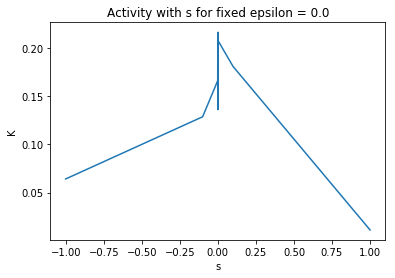

In [9]:
ss = np.array([-1., -1e-1, -1e-3, -1e-4, 0., 1e-4, 1e-3, 1e-1, 1.])

#logging.basicConfig(level=logging.INFO)
eps = 0.

activities = np.zeros(ss.size)
for i,s in enumerate(ss):
    #print("Softening parameter, epsilon: {}; Biasing field, s: {}".format(eps, s))
    fa_kcm = SoftenedFA(gamma=0.25, s=s, eps=eps, num_burnin_steps=1000, num_sites=60, num_steps=1000)
    tps = SoftenedFATPS(fa_kcm, fa_kcm.activity)
    activities[i] = tps.mc_average(10, num_burnin_steps=10)
    print("Activity: {}".format(activities[i]))
        # draw_trajectory(trajectory, occupation_times)
   
plt.plot(ss, activities, )
plt.xlabel("s")
plt.ylabel("K")
plt.title("Activity with s for fixed epsilon = {}".format(eps))

Activity: 0.131358641822
Activity: 0.197576957897
Activity: 0.141056476279
Activity: 0.120272951048
Activity: 0.280203085708
Activity: 0.187969211392


Text(0.5,1,'Activity with epsilon for fixed s = 0.001')

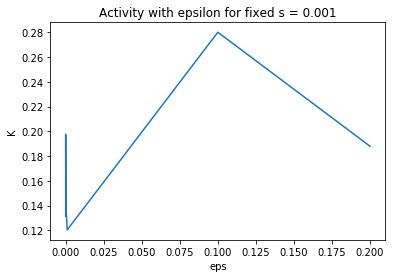

In [8]:
s = 0.001
#logging.basicConfig(level=logging.INFO)
epss = np.array([0., 1e-5, 1e-4, 1e-3, 1e-1, 0.2])


activities = np.zeros(epss.size)
for i, eps in enumerate(epss):
    #print("Softening parameter, epsilon: {}; Biasing field, s: {}".format(eps, s))
    fa_kcm = SoftenedFA(gamma=0.25, s=s, eps=eps, num_burnin_steps=1000, num_sites=60, num_steps=1000)
    tps = SoftenedFATPS(fa_kcm, fa_kcm.activity)
    activities[i] = tps.mc_average(10, num_burnin_steps=10)
    print("Activity: {}".format(activities[i]))
    # draw_trajectory(trajectory, occupation_times)
   
plt.plot(epss, activities)
plt.xlabel("eps")
plt.ylabel("K")
plt.title("Activity with epsilon for fixed s = {}".format(s))